In [25]:
#importing all important libraries 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

LOADING DATASET

In [26]:
#df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive\\churn-bigml-20.csv")
df = pd.read_csv(r"C:\Users\hp\Downloads\archive\churn-bigml-80.csv")
print(df.shape)

(2666, 20)


In [27]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [29]:
#check for null values in data set
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [30]:
#check for duplicate values in dataset
df.duplicated().sum()

np.int64(0)

In [31]:
df=df.select_dtypes(exclude=["bool_","object_"])
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [32]:
corr_abs = df.corr().abs()  # Compute the absolute correlation matrix

# Extract the upper triangle of the correlation matrix without the diagonal
sol = (
    corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

# Display the result
print(sol)


Total day minutes      Total day charge         1.000000
Total eve minutes      Total eve charge         1.000000
Total night minutes    Total night charge       0.999999
Total intl minutes     Total intl charge        0.999993
Account length         Total day calls          0.038862
                                                  ...   
Area code              Number vmail messages    0.000584
Number vmail messages  Total night charge       0.000229
                       Total night minutes      0.000224
Total eve calls        Total night minutes      0.000175
                       Total night charge       0.000135
Length: 120, dtype: float64


In [33]:
#df = df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1,inplace=False)
#print(df.shape)  # No parentheses needed
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\hp\\Downloads\\archive\\churn-bigml-20.csv')

# Check if the DataFrame is loaded correctly
if df is not None:
    print("DataFrame loaded successfully. Shape:", df.shape)
else:
    print("Failed to load DataFrame.")

# Drop the selected columns
df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1, inplace=True)

# Check the new shape (rows, columns)
print("New shape of the DataFrame:", df.shape)


DataFrame loaded successfully. Shape: (667, 20)
New shape of the DataFrame: (667, 16)


array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'Number vmail messages'}>],
       [<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total eve minutes'}>],
       [<Axes: title={'center': 'Total eve calls'}>,
        <Axes: title={'center': 'Total night minutes'}>,
        <Axes: title={'center': 'Total night calls'}>],
       [<Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Customer service calls'}>]], dtype=object)

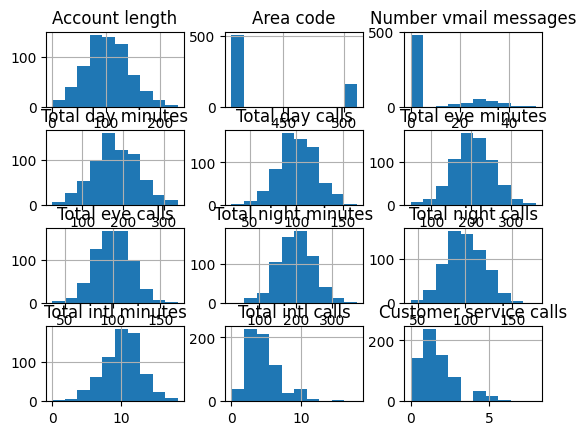

In [34]:
df.hist()

Categorical columns: ['State', 'International plan', 'Voice mail plan', 'Churn']


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


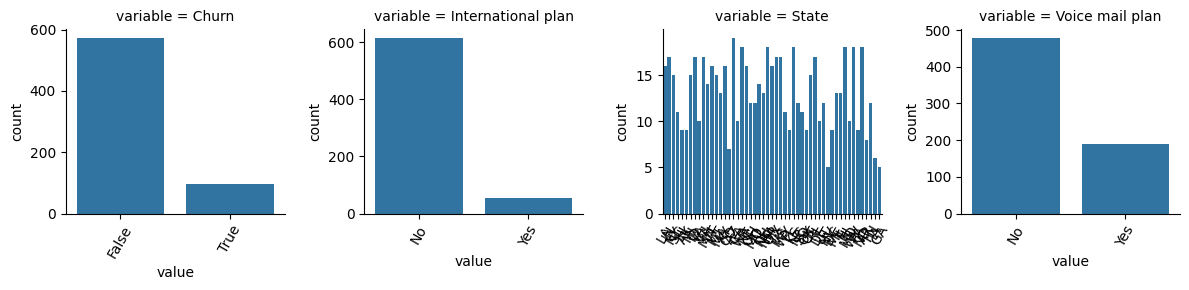

In [35]:
df=pd.read_csv('C:\\Users\\hp\\Downloads\\archive\\churn-bigml-20.csv')
df_cat = df.select_dtypes(include=['object','bool', 'category']).columns.tolist()
print("Categorical columns:", df_cat)
#to plot categorical data using seaborn facetgrid an pandas melt function
f=pd.melt(df,value_vars=sorted(df_cat))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [36]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['State']=label_encoder.fit_transform(df['State'])
df['International plan']=label_encoder.fit_transform(df['International plan'])
df['Voice mail plan']=label_encoder.fit_transform(df['Voice mail plan'])
df['Area code']=label_encoder.fit_transform(df['Area code'])
print(df.dtypes)


State                       int64
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [37]:
y=df['Churn']
y.size

667

In [38]:
y=y.replace({'True':0,'False':1})

In [39]:
#prepare the feature matrix
x=df.loc[:,df.columns !='Churn']

In [40]:
x.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,34,161,1,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,40,111,1,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,11,49,2,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [41]:
#standardizing the data 
scaler=preprocessing.StandardScaler()
x=scaler.fit_transform(x)

In [42]:
print(x)

[[-0.56496076  0.34712707 -1.40484586 ... -0.21274705 -0.54771446
  -0.4230984 ]
 [-0.7728472  -0.92773053  0.01705427 ...  0.5935159   0.87784318
   1.82855024]
 [ 0.54376694  1.42585272  0.01705427 ...  1.80291033 -1.72247956
   1.82855024]
 ...
 [ 1.37531271 -1.05031299  0.01705427 ...  1.39977885  1.04943809
   1.0780007 ]
 [ 1.58319915  1.37681974  0.01705427 ... -0.21274705  0.48185495
  -0.4230984 ]
 [-1.39650653  1.98973205  1.43895441 ...  2.2060418  -1.86767524
   0.32745115]]


In [43]:
#from sklearn.model_selection import StratifiedGroupKFold
#from sklearn.base import clone
#from sklearn.ensemble import GradientBoostingClassifier
#
#skfolds = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)  
#gb_clf = GradientBoostingClassifier(random_state=42)
#print(x.shape)
#print(y.shape)
#
#for train_index, test_index in skfolds.split(x, y):  
#    clone_clf = clone(gb_clf)
#    x_train_folds = x[train_index]
#    y_train_folds = y[train_index]
#    x_test_fold = x[test_index]
#    y_test_fold = y[test_index]
#
#    clone_clf.fit(x_train_folds, y_train_folds)
#    y_pred = clone_clf.predict(x_test_fold)
#    n_correct = sum(y_pred == y_test_fold)
#
#    print("RESULTS FOR GRADIENT BOOSTING CLASSIFIER ", n_correct / len(y_pred))
#  

(667, 19)
(667,)


TypeError: iteration over a 0-d array

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.base import clone

# Initialize SVC model
svc_clf = SVC(random_state=42)

# Stratified K-Fold Cross-Validation (if you don't need groups, use StratifiedKFold)
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in skfolds.split(x, y):
    # Clone the classifier to ensure a fresh model for each fold
    clone_clf = clone(svc_clf)
    
    # Split data into training and testing folds
    x_train_folds, y_train_folds = x[train_index], y[train_index]
    x_test_fold, y_test_fold = x[test_index], y[test_index]
    
    # Fit the model on the training data
    clone_clf.fit(x_train_folds, y_train_folds)
    
    # Predict on the test fold
    y_pred = clone_clf.predict(x_test_fold)
    
    # Calculate accuracy
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)

    print("Accuracy for SVC on this fold:", accuracy)


In [ ]:
#implementing random forest 
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state = 42)
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in skfolds.split(x, y):
    # Clone the classifier to ensure a fresh model for each fold
    clone_clf = clone(rf_clf)
    
    # Split data into training and testing folds
    x_train_folds, y_train_folds = x[train_index], y[train_index]
    x_test_fold, y_test_fold = x[test_index], y[test_index]
    
    # Fit the model on the training data
    clone_clf.fit(x_train_folds, y_train_folds)
    
    # Predict on the test fold
    y_pred = clone_clf.predict(x_test_fold)
    
    # Calculate accuracy
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)

    print("Accuracy for SVC on this fold:", accuracy)

In [ ]:
#evaluating confusion matrix 
from sklearn.model_selection import cross_val_predict
y_pred= cross_val_predict(rf_clf,x,y,cv=10)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

In [ ]:
#here 568 are not churn and code predicted it correctly (TN)
#where 4 are wrongly classified (FP)
#in the second row of confusion matrix 
#45 churn and code predict it (TP)
#WHERE 50 WERE NOT CHURN AND ARE (FN)

# i.e precision= TP/(TP+FP)
# i.e recall = TP/(TP+FN)
# on putting values precision = 91% approx
#recall value =47%